In [1]:
import pandas as pd
import numpy as np #arrays
import matplotlib.pyplot as plt #plot graphs
import seaborn as sns #It provides a high-level interface for drawing attractive and informative statistical graphics.

In [5]:
cd Downloads\Udemy Projects\1)Text_data_analysis

C:\Users\user\Downloads\Udemy Projects\1)Text_data_analysis


In [3]:
comments = pd.read_csv("GBcomments.csv",error_bad_lines=False)

b'Skipping line 113225: expected 4 fields, saw 5\n'
b'Skipping line 158379: expected 4 fields, saw 7\nSkipping line 241590: expected 4 fields, saw 5\nSkipping line 245637: expected 4 fields, saw 7\n'
b'Skipping line 521402: expected 4 fields, saw 5\n'


In [4]:
comments.head()

,video_id,comment_text,likes,replies
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0,0
1,jt2OHQh0HoQ,To be there with a samsung phone\n😂😂😂,1,0
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0,0
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0,0
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0


1)Perform the sentiment analysis on youtube comments

2)Perform EDA for positive sentences

3)Perform EDA for negative sentences

In [5]:
from textblob import TextBlob

TextBlob :
     TextBlob is a Python (2 and 3) library for processing textual data. It provides a simple API for diving into common natural language processing (NLP) tasks such as part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, translation, and more.

In [ ]:
TextBlob(' Its more accurate to call it the M+ (1000) because the price is closer than calling it the X (10)').sentiment.polarity

Polarity :
     TextBlob returns polarity and subjectivity of a sentence. Polarity lies between [-1,1], -1 defines a negative sentiment and 1 defines a positive sentiment. Negation words reverse the polarity. TextBlob has semantic labels that help with fine-grained analysis.

In [6]:
comments.isna().sum()

video_id         0
comment_text    28
likes            0
replies          0
dtype: int64

isna() :
    isna() function is used to detect missing values. It return a boolean same-sized object indicating if the values are NA. NA values, such as None or numpy. NaN, gets mapped to True values.

In [7]:
comments.dropna(inplace=True)

dropna() :
    Pandas DataFrame dropna() function is used to remove rows and columns with Null/NaN values. By default, this function returns a new DataFrame and the source DataFrame remains unchanged. We can create null values using None, pandas. NaT, and numpy.
(inplace=True) :
    The 'inplace=True' argument stands for the data frame has to make changes permanent eg. dropna(axis='index', how='all', inplace=False) it thinks that you do not want to change the orignial DataFrame , therefore it instead creates a new copy for you with the required changes.

In [14]:
polarity=[]

for i in comments['comment_text']:
    polarity.append(TextBlob(i).sentiment.polarity)

KeyboardInterrupt: 

In [10]:
comments['polarity'] = polarity

ValueError: Length of values (570189) does not match length of index (718424)

In [9]:
comments.head()

,video_id,comment_text,likes,replies
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0,0
1,jt2OHQh0HoQ,To be there with a samsung phone\n😂😂😂,1,0
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0,0
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0,0
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0


In [ ]:
comments_positive = comments[comments['polarity']==1]

In [ ]:
comments_positive.shape

In [ ]:
comments_positive.head()

WordCloud :
    Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud. Word clouds are widely used for analyzing data from social network websites.

In [ ]:
from wordcloud import WordCloud,STOPWORDS

In [ ]:
stopwords = set(STOPWORDS)

In [ ]:
total_comments = ''.join(comments_positive['comment_text'])

In [ ]:
wordcloud = WordCloud(width = 1000,height = 500,stopwords= stopwords).generate(total_comments)

In [ ]:
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis("off")

1)Analysing tags column,what are treanding tags on youtube? 

In [6]:
videos = pd.read_csv("GBvideos.csv",error_bad_lines=False)

b'Skipping line 2398: expected 11 fields, saw 21\nSkipping line 2797: expected 11 fields, saw 21\n'


In [ ]:
videos.head()

In [ ]:
tags_complete = ''.join(videos["tags"])

In [ ]:
tags_complete

In [ ]:
import re

RE :
A regular expression (or RE) specifies a set of strings that matches it; the functions in this module let you check if a particular string matches a given regular expression (or if a given regular expression matches a particular string, which comes down to the same thing).

In [2]:
tags = re.sub('[^a-zA-z]',' ',tags_complete)

NameError: name 're' is not defined

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud.

In [ ]:
tags

In [ ]:
re.sub(" +"," ",tags)

In [ ]:
wordcloud = WordCloud(width = 1000,height = 500,stopwords= stopwords).generate(tags)

In [ ]:
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis("off")

2)Perform analytics on likes,views and dislikes and find out how they are co-related? 

pairplot :
A pairplot plot a pairwise relationships in a dataset. The pairplot function creates a grid of Axes such that each variable in data will by shared in the y-axis across a single row and in the x-axis across a single column.
regplot() :
This method is used to plot data and a linear regression model fit.
distplot() :
A distplot plots a univariate distribution of observations.


Text(0.5, 1.0, 'regression plot')

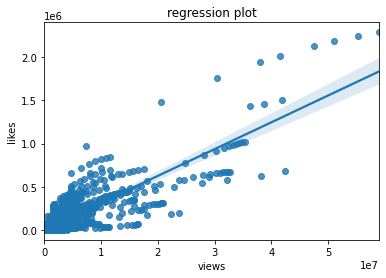

In [7]:
sns.regplot(data=videos,x = "views",y= "likes")
plt.title("regression plot")

In [ ]:
df_corr = videos[["views","likes","dislikes"]]

In [ ]:
df_corr.corr()

annot = True :
    annot: If True, write the data value in each cell. 

In [ ]:
sns.heatmap(df_corr.corr(),annot=True)

In [ ]:
comments.head()

In [ ]:
comments["comment_text"][1]

In [ ]:
import emoji

In [ ]:
comment = comments["comment_text"]

In [ ]:
[c for c in comment if c in emoji.UNICODE_EMOJI]

In [ ]:
str = ''
for i in comments["comment_text"]:
    list=[c for c in comment if c in emoji.UNICODE_EMOJI]
    for ele in list:
        str = str+ele

In [ ]:
str

In [ ]:
result = {}
for i in set(str):
    result[i]=str.count

In [ ]:
final={}
for key,value in sorted(result.items(),key = lambda items:items[]):
    final[key] = value


In [ ]:
keys =[*final.keys()]

In [ ]:
values =[*final.values()]

In [ ]:
df=pd.DataFrame({"chars":keys[-20:],"num":values[-20:]}

In [ ]:
import plotly.graph_objs as go
from plotly.offline import iplot

In [ ]:
trace = go.bar(
x =df["char"],
y =df["num"]

)